In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn import preprocessing
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Load Data

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_store_customer_data.csv')
df.head(3)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60


## 1.1 Data Pre-processing

In [ ]:
# •	Find out the number of rows and columns in your data frame by using function shape
print("Data Shape: ", df.shape)
print("Rows in Data: ", df.shape[0])
print("Columns in Data: ", df.shape[1])

Data Shape:  (2512, 11)
Rows in Data:  2512
Columns in Data:  11


## 1.2. Missing Values

In [ ]:
df.isnull().sum()

,0
Transaction_date,0
Transaction_ID,0
Gender,28
Age,42
Marital_status,0
State_names,0
Segment,0
Employees_status,26
Payment_method,0
Referal,155


In [ ]:
# Drop column Transaction_date from main dataframe
df.drop(columns = 'Transaction_date', inplace=True)
# Remove rows from data frame where Employee_status values are missing.
df.dropna(subset = ["Employees_status"], inplace=True)
# Replace Amount_spent missing values with the mean value of amount_spent.
mean_AS = df['Amount_spent'].mean()
df['Amount_spent'].fillna(mean_AS, inplace=True)
# Replace missing values in Age with the mean age value.
mean_Age = df['Age'].mean()
df['Age'].fillna(mean_Age, inplace=True)
# Replace missing values in Referal with the mean Referal value.
mean_R = df['Referal'].mean()
df['Referal'].fillna(mean_R, inplace=True)
# Replace missing values in “Employee_status” with the mode value of column “Employee_status”.
mode_emp = df['Employees_status'].mode().iloc[0]
df['Employees_status'].fillna(mode_emp, inplace=True)
# Replace missing values in Gender with the mode value of column Gender.
mode_Gender = df['Gender'].mode().iloc[0]
df['Gender'].fillna(mode_Gender, inplace=True)

<ipython-input-6-465aa33d4e3b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount_spent'].fillna(mean_AS, inplace=True)
<ipython-input-6-465aa33d4e3b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.isnull().sum()

,0
Transaction_ID,0
Gender,0
Age,0
Marital_status,0
State_names,0
Segment,0
Employees_status,0
Payment_method,0
Referal,0
Amount_spent,0


## 1.3. Inconsistant Data

In [ ]:
# Drop rows where Employees_status is unemployment and Payement_method is other
print('Data shape before droping rows', df.shape)
df = df.drop(df[(df['Employees_status']=='Unemployment') & (df['Payment_method']=='Other')].index)
print('Data shape after droping rows', df.shape)

Data shape before droping rows (2486, 10)
Data shape after droping rows (2428, 10)


## 1.4. Encodings

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2428 entries, 1 to 2511
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    2428 non-null   int64  
 1   Gender            2428 non-null   object 
 2   Age               2428 non-null   float64
 3   Marital_status    2428 non-null   object 
 4   State_names       2428 non-null   object 
 5   Segment           2428 non-null   object 
 6   Employees_status  2428 non-null   object 
 7   Payment_method    2428 non-null   object 
 8   Referal           2428 non-null   float64
 9   Amount_spent      2428 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 208.7+ KB


In [ ]:
# Convert categorical data into numerical data
##### Nominal Categorical data
# 1. Check the unique values in the column
# 2. Replace the categories to appropriate numeric value
# Convert nominal categorical data to numerical data using replace
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
# Convert nominal categorical data to numerical data using replace
df['Marital_status'] = df['Marital_status'].replace({'Single': 0, 'Married': 1})
df['Employees_status'] = df['Employees_status'].replace({'Employees': 0, 'workers': 1,'self-employed': 2, 'Unemployment': 3})
df['Payment_method'] = df['Payment_method'].replace({'PayPal': 0, 'Card': 1, 'Other':2})
# Convert categorical data to numerical data using cat.codes
df['State_names'] = df['State_names'].astype('category')
df['State_names'] = df['State_names'].cat.codes
# Convery ordinal categorical feature to numeric using one hot encoding
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['Segment'])
# Drop column B as it is now encoded
df = df.drop('Segment',axis = 1)
# Join the encoded df
df = df.join(one_hot)

<ipython-input-10-9946df4f639f>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
<ipython-input-10-9946df4f639f>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_status'] = df['Marital_status'].replace({'Single': 0, 'Married': 1})
<ipython-input-10-9946df4f639f>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2428 entries, 1 to 2511
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    2428 non-null   int64  
 1   Gender            2428 non-null   int64  
 2   Age               2428 non-null   float64
 3   Marital_status    2428 non-null   int64  
 4   State_names       2428 non-null   int8   
 5   Employees_status  2428 non-null   int64  
 6   Payment_method    2428 non-null   int64  
 7   Referal           2428 non-null   float64
 8   Amount_spent      2428 non-null   float64
 9   Basic             2428 non-null   bool   
 10  Gold              2428 non-null   bool   
 11  Missing           2428 non-null   bool   
 12  Platinum          2428 non-null   bool   
 13  Silver            2428 non-null   bool   
dtypes: bool(5), float64(3), int64(5), int8(1)
memory usage: 184.9 KB


# 2. Feature Selection


Split out data into predictors and target variables. Target variable is the feature/column we want to
predict, and all the other features are predictors. Here we are training a decision tree to predict the
maritial_status of our online customers

In [ ]:
# data Split
X = df.drop(columns="Marital_status")
y = df["Marital_status"]

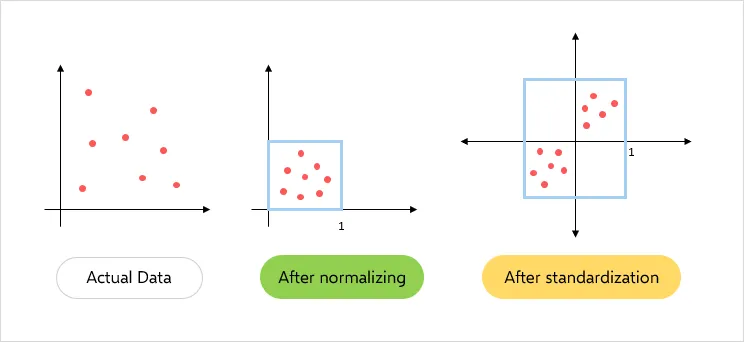



*   in scaling, you’re changing the range of the data, while
*   in normalization, you’re changing the shape of the distribution of the data.




In [ ]:
#Normalised Data
normalized_X = preprocessing.normalize(X)
# Standardised Data
standardized_X = preprocessing.scale(X)

In [ ]:
#encode categorical data into digits
y = pd.get_dummies(y)
print(y.head())


       0      1
1   True  False
2  False   True
3   True  False
4   True  False
5   True  False


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
stratify=y, random_state=1)

# 4. Building Decision Tree Model

In [ ]:
# Create Decision Tree classifier object
dt = DecisionTreeClassifier()
# Train Decision Tree Classifier
Result_DT = dt.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = dt.predict(X_test)
#Accuracy can be computed by comparing actual test set values and predicted values.
#accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)


In [ ]:
########################################## Using Normal Data
# decision tree construction
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dt= dt.fit(X_train, y_train)
#pridiction
y_pred = dt.predict(X_test)
#accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Data Accuracy:",data_accuracy)

# Using Normalised Data

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(normalized_X,
y,test_size=0.3, stratify=y, random_state=1)
# decision tree construction
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dt= dt.fit(X_train, y_train)
#prediction
y_pred = dt.predict(X_test)
#accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Normalised data Accuracy:",data_accuracy)



Normalised data Accuracy: 0.5212620027434842


# Using Standardised Data

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(standardized_X,
y,test_size=0.3,stratify=y, random_state=1)
# decision tree construction
dt = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dt= dt.fit(X_train, y_train)
#pridiction
y_pred = dt.predict(X_test)
#accuracy
data_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Standardised Accuracy:",data_accuracy)

Standardised Accuracy: 0.5061728395061729


# 5. Classification Report

In [ ]:
#The classification report could be generated by calling classification_report method.
print(metrics.classification_report(y_test, y_pred,
digits=2,output_dict=False))

              precision    recall  f1-score   support

           0       0.41      0.44      0.43       303
           1       0.58      0.55      0.57       426

   micro avg       0.51      0.51      0.51       729
   macro avg       0.50      0.50      0.50       729
weighted avg       0.51      0.51      0.51       729
 samples avg       0.51      0.51      0.51       729



# 6. Feature Importance

In [ ]:
# Variable importance in classifier
print("Variable importacne in the classifier.")
pd.concat((pd.DataFrame(df.iloc[:, 1:].columns, columns =
['variable']),
pd.DataFrame(dt.feature_importances_, columns =
['importance'])),
axis = 1).sort_values(by='importance', ascending =
False)[:20]

Variable importacne in the classifier.


,variable,importance
0,Gender,0.252323
7,Amount_spent,0.185613
2,Marital_status,0.175987
3,State_names,0.163701
4,Employees_status,0.045222
5,Payment_method,0.039608
6,Referal,0.037073
1,Age,0.030782
8,Basic,0.023356
12,Silver,0.017119


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5843621399176955


#Criterion

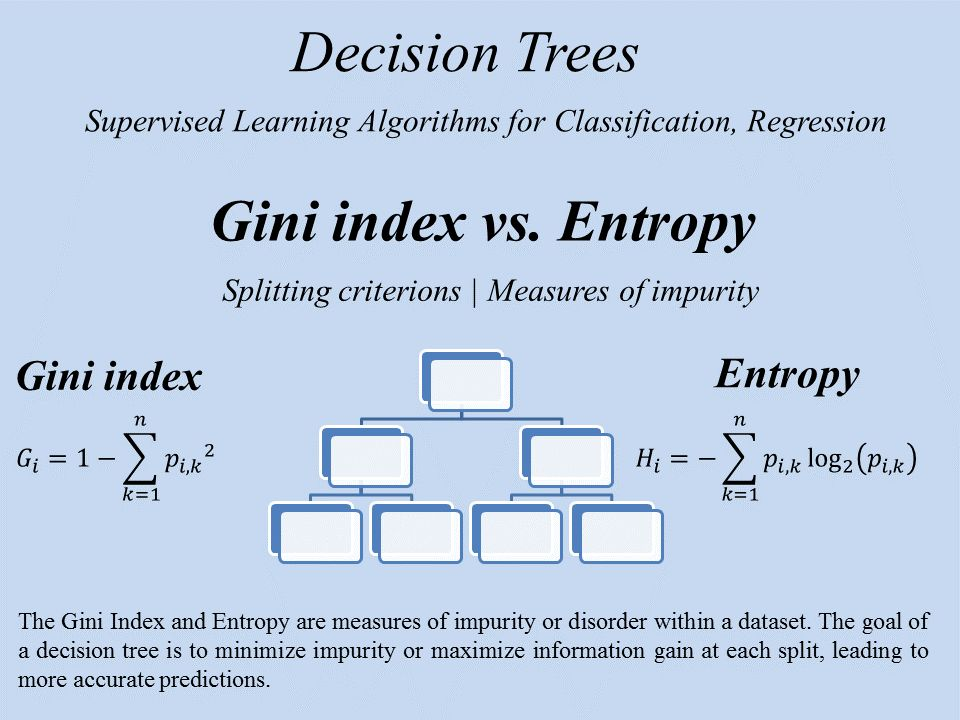

#Max-Depth

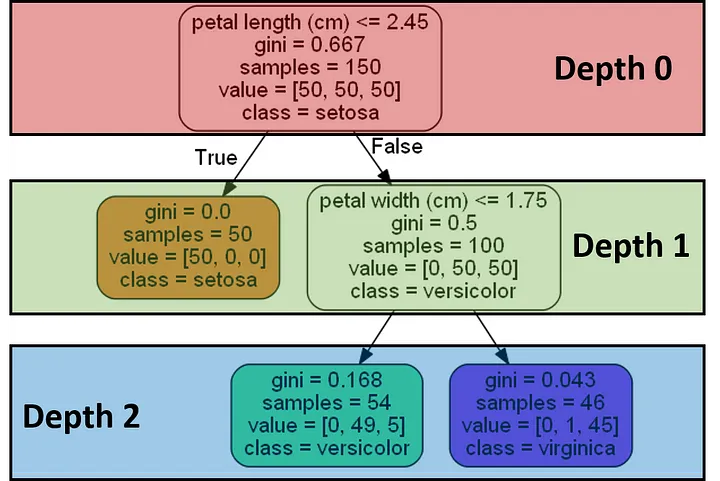

#Splitter

 If using "best", for all features, the algorithm selects the "best" point to split, then choose the best feature as the final decision. If using "random", for all features, the algorithm "randomly" selects a point to split, then choose the best feature as the final decision.

In [23]:
# prompt: choose node splitter best vs random

# ... (your existing code)

# Load your data (replace with your actual data loading)
# data = pd.read_csv(...)
# X = data[['feature1', 'feature2', ...]]
# y = data['target_variable']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Create Decision Tree with best splitter
best_splitter_tree = DecisionTreeClassifier(criterion='entropy', splitter='best')
best_splitter_tree.fit(X_train, y_train)
y_pred_best = best_splitter_tree.predict(X_test)

# Create Decision Tree with random splitter
random_splitter_tree = DecisionTreeClassifier(criterion='entropy', splitter='random')
random_splitter_tree.fit(X_train, y_train)
y_pred_random = random_splitter_tree.predict(X_test)

# Evaluate the models
print("Best Splitter:")
print(classification_report(y_test, y_pred_best))

print("Random Splitter:")
print(classification_report(y_test, y_pred_random))

# You can compare the accuracy, precision, recall, and F1-score of both models
# to see which splitter performs better for your dataset.

Best Splitter:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41       258
           1       0.56      0.56      0.56       349

   micro avg       0.50      0.50      0.50       607
   macro avg       0.49      0.49      0.49       607
weighted avg       0.50      0.50      0.50       607
 samples avg       0.50      0.50      0.50       607

Random Splitter:
              precision    recall  f1-score   support

           0       0.40      0.36      0.38       258
           1       0.56      0.60      0.58       349

   micro avg       0.50      0.50      0.50       607
   macro avg       0.48      0.48      0.48       607
weighted avg       0.49      0.50      0.50       607
 samples avg       0.50      0.50      0.50       607

